In [66]:
# Authors: Lily Picchioni & Andrew Janedy
# March 2025

# Problem Statement: Diabetes in the United States. What living conditions and geographical areas within the United States can lead to an increased risk
# of diabetes?

# Background: Diabetes is a growing conern within The United States, with 37.3 million people currently diagnosed, rates of diagnosed cases of
# diabetes has risen dramatically over the last 20 years. The disease can cause life threatening symptoms and can disrupt an individual's quality of life. 
# Our project has the potential to contribute to the public domain by identifying possible causes of the increase of diabetes in The United States. We
# have combined multiple data sets in an attempt to find potential patterns, including data on diabetes, obesity, poverty and food security in the US.
# Identifying potential relationships between these data sets is the first step in reducing the prevalence of this life threatening disease in the United
# States. If we can draw significant parallels between an individuals ability to obtain quality, healthy foods, and the prevalence of conditions such as 
# obesity and diabetes, this data can be used to assist regions more likely to be impacted by these ailments.

# Relevant data frames:
# - diabetes_data: An entry for each state representing the rate of diabetes for every year between 2000-2022
# --- Index: 'State' (The unique state name and D.C.)
# --- Columns: XXXX (where XXXX represents the numerical year)
# --- Values: 'Total - Percentage' (The % rate of diabetes per capita for the given year)


In [67]:
# IMPORTS

import matplotlib
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [80]:
# DATA FRAMES

diabetes_data, obesity_data, poverty_data, food_security_data, obes_diab_pove_data, all_data = [    
    pd.read_parquet("../data_frames/diabetes_data.parquet"),
    pd.read_parquet("../data_frames/obesity_data.parquet"),
    pd.read_parquet("../data_frames/poverty_data.parquet"),
    pd.read_parquet("../data_frames/food_security_data_filtered.parquet"),
    pd.read_parquet("../data_frames/obes_diab_pove_data.parquet"),
    pd.read_parquet("../data_frames/all_data.parquet")
]
    


In [69]:
print(f"diabetes_data contains {len(diabetes_data)} rows of data")
print(f"obesity_data contains {len(obesity_data)} rows of data")
print(f"poverty_data contains {len(poverty_data)} rows of data")
print(f"food_security_data contains {len(food_security_data)} rows of data")

diabetes_data contains 50 rows of data
obesity_data contains 50 rows of data
poverty_data contains 50 rows of data
food_security_data contains 289907 rows of data


In [70]:
# This was the most complete data set as it included all years 2000 - 2022

diabetes_data.head()

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,,,,,,,,,,,
Alabama,7.3,9.4,8.4,8.4,7.9,9.3,9.5,9.8,10.6,10.9,...,12.7,11.8,12.0,13.2,12.5,12.7,12.2,12.9,13.3,13.4
Alaska,5.9,6.1,6.4,6.1,6.5,5.6,7.0,6.5,7.3,6.5,...,7.3,7.6,7.8,7.7,7.7,8.7,7.2,7.4,8.0,8.3
Arizona,5.9,6.1,6.4,6.1,6.5,7.3,8.3,8.2,7.6,8.2,...,9.8,9.1,9.1,9.7,9.4,9.6,9.8,9.7,9.7,11.3
Arkansas,5.9,7.3,7.5,7.0,6.7,7.7,7.7,8.8,8.9,9.5,...,10.5,11.5,11.2,12.1,10.8,12.4,12.1,11.7,10.8,13.9
California,7.1,6.6,8.0,7.5,7.5,7.4,8.5,7.8,8.7,9.2,...,9.9,9.9,9.6,9.7,9.8,9.7,9.4,9.2,10.9,10.6


In [71]:
# The original data set included data from 2011 - 2022, the values from 2000 - 2010 were imputed using linear regression

obesity_data.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,,,,,,,,,,,
Alabama,24.5,25.2,25.9,26.6,27.2,27.9,28.6,29.3,29.9,30.6,...,32.4,33.5,35.6,35.7,36.3,36.2,36.1,39.0,39.9,38.3
Alaska,21.6,22.1,22.6,23.2,23.7,24.2,24.8,25.3,25.8,26.3,...,28.4,29.7,29.8,31.4,34.2,29.5,30.5,31.9,33.5,32.1
Arizona,18.7,19.3,19.9,20.6,21.2,21.9,22.5,23.1,23.8,24.4,...,26.8,28.9,28.4,29.0,29.5,29.5,31.4,30.9,31.3,33.2
Arkansas,27.8,28.3,28.8,29.2,29.7,30.2,30.7,31.1,31.6,32.1,...,34.6,35.9,34.5,35.7,35.0,37.1,37.4,36.4,38.7,37.4
California,18.5,19.0,19.4,19.9,20.3,20.7,21.2,21.6,22.1,22.5,...,24.1,24.7,24.2,25.0,25.1,25.8,26.2,30.3,27.6,28.1


In [72]:
# The original data set included years 2019 - 2021, additional data was found from 2001 - 2010, and data for the year 2015.
# The values for 2000, 2011-2014, and 2016-2018 were imputed using linear regression

poverty_data.head()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
State,,,,,,,,,,,,,,,,,,,,,
Alabama,15.5,15.5,15.5,14.7,16.0,16.9,16.6,16.9,15.7,16.6,...,17.3,17.3,18.5,18.5,18.5,18.5,12.9,14.9,15.9,15.9
Alaska,9.2,9.2,9.2,9.2,9.4,10.8,10.9,8.9,8.4,11.7,...,12.4,12.4,10.3,10.3,10.3,10.3,10.2,13.3,11.4,11.4
Arizona,13.8,13.8,13.8,13.5,13.9,14.4,14.2,14.2,14.7,21.2,...,18.6,18.6,17.4,17.4,17.4,17.4,9.9,10.8,12.6,12.6
Arkansas,17.6,17.6,17.6,18.8,16.4,17.2,17.3,17.9,17.3,18.9,...,15.5,15.5,19.1,19.1,19.1,19.1,14.1,14.2,16.8,16.8
California,13.2,13.2,13.2,13.1,13.2,13.3,13.1,12.4,13.3,15.3,...,16.3,16.3,15.3,15.3,15.3,15.3,10.1,11.0,11.9,11.9


In [73]:
food_security_data.head()

,Year,State Abbreviation,Food Needs Met,SNAP Benefits,Have Desirable Food,Food Pantry,Soup Kitchen/Shelter,Food Security Status,State
0,2020,1,2,-1,2,2,2,1,Alabama
1,2020,1,2,-1,1,-1,-1,1,Alabama
2,2020,1,2,-1,1,-1,-1,1,Alabama
3,2020,1,2,-1,1,-1,-1,1,Alabama
4,2020,1,2,1,2,2,2,1,Alabama


In [35]:
obes_diab_pove_data.head()

,State,Year,Obesity_Percentage,Diabetes_Percentage,Poverty_Percentage
0,Alabama,2000,24.5,7.3,15.5
1,Alaska,2000,21.6,5.9,9.2
2,Arizona,2000,18.7,5.9,13.8
3,Arkansas,2000,27.8,5.9,17.6
4,California,2000,18.5,7.1,13.2


In [81]:
all_data.head()

,Year,State Abbreviation,Food Needs Met,SNAP Benefits,Have Desirable Food,Food Pantry,Soup Kitchen/Shelter,Food Security Status,State,Obesity_Percentage,Diabetes_Percentage,Poverty_Percentage
0,2020,1,2,-1,2,2,2,1,Alabama,39.0,12.9,14.9
1,2020,1,2,-1,1,-1,-1,1,Alabama,39.0,12.9,14.9
2,2020,1,2,-1,1,-1,-1,1,Alabama,39.0,12.9,14.9
3,2020,1,2,-1,1,-1,-1,1,Alabama,39.0,12.9,14.9
4,2020,1,2,1,2,2,2,1,Alabama,39.0,12.9,14.9


In [82]:
print(len(all_data))

289907


In [83]:
# This script generates an interactive map using Folium, with state-level markers that display 
# graphs of obesity, poverty, and diabetes statistics in popups when clicked. The graphs can
# be displayed either vertically or horizontally in the interactive map by commenting our the 
# appropriate html code.

import folium
from folium import Popup
from IPython.display import display, HTML
import os
from PIL import Image
import base64


# Import the state coordinates from the config file
from config import state_coords

# Folder paths for each type of graph
folders = {
    'Obesity': 'state_obesity_graphs',
    'Poverty': 'state_poverty_graphs',
    'Diabetes': 'state_diabetes_graphs'
}

# Function to convert an image file into a base64 encoded string
# so it can be embedded in the HTML
def img_to_base64(image_path):
    with open(image_path, "rb") as img_file:
        return base64.b64encode(img_file.read()).decode('utf-8')


# Generates the HTML content for each state's popup
def generate_popup_html(state):
    html = f"<b>{state}</b><br>"
    imgs = {}

    for label, folder in folders.items():
        graph_path = os.path.join(folder, f"{state.replace(' ', '_')}_{label.lower()}_graph.png")
        if os.path.exists(graph_path):
            img_data = img_to_base64(graph_path)
            imgs[label] = f"<img src='data:image/png;base64,{img_data}' style='width:300px;height:auto;'>"
        else:
            imgs[label] = f"<p><b>{label}:</b> Graph not found.</p>"

    # USE THIS HTML FORMAT TO DISPLAY THE GRAPH VERTICALLY IN THE INTERATIVE MAP POP UP WINDOW (Streamlit App)
    #
    html += f"""
    <div style="display: flex; flex-direction: column; align-items: center;">
        <div style="text-align:center; margin-bottom: 10px;">
            <b>Obesity</b><br>{imgs['Obesity']}
        </div>
        <div style="text-align:center; margin-bottom: 10px;">
            <b>Poverty</b><br>{imgs['Poverty']}
        </div>
        <div style="text-align:center;">
            <b>Diabetes</b><br>{imgs['Diabetes']}
        </div>
    </div>
    """

    # USE THIS HTML FORMAT TO DISPLAY THE GRAPH HORIZONTALLY IN THE INTERACTIVE MAP POP UP WINDOW (Jupyter Notebook)
    #
    # html += f"""
    # <div style="display: flex; flex-direction: row; justify-content: space-evenly; align-items: center;">
    #     <div style="text-align:center; margin-right: 10px;">
    #         <b>Obesity</b><br>{imgs['Obesity']}
    #     </div>
    #     <div style="text-align:center; margin-right: 10px;">
    #         <b>Poverty</b><br>{imgs['Poverty']}
    #     </div>
    #     <div style="text-align:center;">
    #         <b>Diabetes</b><br>{imgs['Diabetes']}
    #     </div>
    # </div>
    # """
    return html

# Create map
state_map = folium.Map(location=[39.0900, -95.7100], zoom_start=4)

# Add markers
for state, coords in state_coords.items():
    popup_html = generate_popup_html(state)
    popup = Popup(popup_html, max_width=1200, max_height=900)  # Adjust max height as needed
    folium.Marker(location=coords, popup=popup).add_to(state_map)

# Save the map
state_map.save("state_map.html")    

state_map

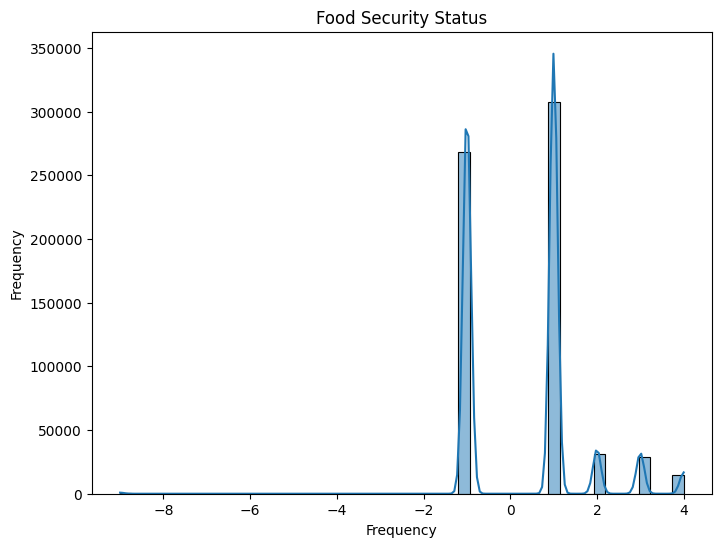

In [119]:
plt.figure(figsize=(8, 6))
sns.histplot(food_security_data['Food Security Status'], bins=50, kde=True)
plt.title('Food Security Status')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.show()

In [120]:
# Any number below zero means that they refused to respond
# Drop the data for food security status that has a number below zero
food_security_data = food_security_data[food_security_data['Food Security Status'] > 0]

In [ ]:
# Plot the histogram again

plt.figure(figsize=(8, 6))
sns.histplot(food_security_data['Food Security Status'], bins=50, kde=True)
plt.title('Food Security Status')
plt.xlabel('Frequency')
plt.ylabel('Frequency')
plt.show()